# Quantum Computing In Qiskit With Examples

In [5]:
#Outcomment to install dependencies.
#import pip
#! pip3 install qiskit
#! pip3 install matplotlib
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute
from IPython.display import Math
from IPython.display import Image
from IPython.core.display import HTML 

# Introduction
This notebook is constructed as a part of the Quantum Experience Hands-on session.<br>
The purpose of this notebook is to give an introduction to the most commonly used functions available in the Qiskit framework.<br>

Before we start, it is important to have som basic knowledge about how the mechanics of a quantum computers work, what we can expect from them and how they can be utilized.

## What is a Qubit?
When we talk about classical computing, we often hear the word 'bit' and _bit_ can refer to zero and one - You can also think it as a binary state, where you have a switch that can be turn off and it can be turned on - either 0 or 1. A quantum computer uses quantum bits, or _qubits_, where the two corresponding states for a qubit are the states |0<b>⟩</b> and |1<b>⟩</b>. 

However, qubits are not restrict to being either |0<b>⟩</b> or |1<b>⟩</b>, but can be either combination of a zero or a one with a quantum mechanical principel called Superposition.

<div class="alert alert-block alert-warning">
    <b>Note:</b> Notation like ‘| ⟩’ is called the Dirac notation, and we’ll be seeing it often, as it’s the standard notation for states in quantum mechanics.
</div>

## Superposition
When a _qubit_ is in the state |0<b>⟩</b>, the result of measuring the _qubit_ will be 0 with a probability of 100 %, which is what happens with a classical bit.<br>
Similarly, the result of measuring a _qubit_ in state |1<b>⟩</b> will yield an outcome of 1 with a probability of 100 %.<br>

For a qubit in a superposition state, the outcome becomes less simple - the outcome of measuring a _qubit_ in superposition, even of a known state, cannot be predicted with certainty. Even for the most simple superposition state, when we use a quantum gate to flip the _qubit_ into superposition (which we will cover later), the superposition state has an equal probability (50 %) of yielding an outcome of either 0 or 1.

This is, however, not the only superpositional state it can obtain, as it in reality can obtain any probability of being either one of them (10%/90%, 25%/75% etc.), which allows us to do more tricks.

## Entanglement
Entanglement is a very special form of superposition, which is key to the power of quantum computing. What that means, is that we have the ability to have two or more _qubits_ in a superposition state, which are inherently linked, such that measurement of one changes the possible measurement outcomes for another, regardless of how far apart the two objects are.<br>

In the quantum computer, we can use this interlinked interaction to do all sorts of interesting tupes of calculations, where different _qubits_ have a persistent ghostly connection with eachother. This means, that if one of the entangled _qubits_ are flipped around, the other entangled _qubit_ will be flipped as well.

# Setting up your quantum circuit

Okay. So now that we have covered the basics, it's time to make some quantum algorithms. The first thing that we need to do is to create a quantum register, a classical register and a circuit. A Quantum Register holds our Qubits, in this example we only define a single Qubit. We also need a Classical Register because when measuring a Qubit, it will always be either 1 or 0, this information is stored in the Classical Register. Finally we need a Quantum Circuit to bind the Quantum Register and the Classical Register.

In [6]:
# Creates a Quantum Register with 1 qubit.
qr = QuantumRegister(1)

# Creates a classical register to hold our measured values
cr = ClassicalRegister(1)

# Creates a Quantum Circuit 
circ = QuantumCircuit(qr,cr)

To view our circuit, we can call the circ.draw() function. This functions prints two things:

    1: q0_0: |0>    q0_0 is our single Qubit.             |0> is the value of the Qubit. 
    2: c0_0: 0      c0_0 is a classical bit.              0 is the value of the bit.
    
Qubits' always starts as a |0>.

In [7]:
circ.draw()

Below is a picture of the IBMQ Composer. This is a tool used for programming Quantum computers. It too has a Quantum Register with Qubits in it (seen as q[0], q[1], q[2] etc.) and a Classical Register that stores the measured values. (seen here as the bottom line with a "c" in front of it)

You might have noticed the colorful boxes with letters in it, to the right. These are called Gates a each one is a speciffic command that can be applied to a Qubit.

In [8]:
Image(url="https://cdn-images-1.medium.com/max/2000/1*c5NCMQAmGOQqIvRK9aiaCg.png")

# Gates

## The X Gate
The X gate flips the state of the Qubit. Meaning that a Qubit with a value of 1 becomes a 0, and vice versa. In traditional computing this can be directly related to that of a NOT gate. We can add an X gate to our circuit like so:

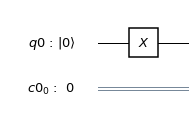

In [9]:
# We use our Qunatum Circuit from earlier and call it measure_x
measure_x = QuantumCircuit(qr,cr)
measure_x.draw();

# Here we apply the X gate to our first and only Qubit in the Quantum Register(qr)
measure_x.x(qr[0])

# Yes, we call draw twice. 
measure_x.draw(output='mpl')

Now if we measure our Qubit it should have a value of |1>, because the Qubit was flipped from it's default state of |0> to |1>.

To measure the Qubit, we first need to run the circuit using a tool from Qiskit called the BasicAer module. Here we are using a Quantum simulator.. The real thing comes later.

In [10]:
# Import Aer framework
from qiskit import BasicAer
from qiskit.quantum_info import state_fidelity, basis_state

In [11]:
# Run the quantum circuit on a statevector simulator backend
backend = BasicAer.get_backend('qasm_simulator')

Now our circuit has run and should have flipped our Qubit. Like we added the X gate earlier we need to add a measure to the circuit.

In [12]:
# Here we append a measure to our circuit
measure_x.measure(qr[0], cr[0]);

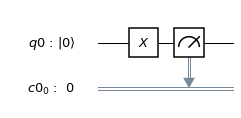

In [13]:
# Here is the circuit again, wiht the (M)easure at the end.
measure_x.draw(output='mpl')

Now we have added a measure to our circuit and we are ready to run our complete circuit. 

The measure will store the state of the Qubit ( |1> ) into the Classical Register, which we can view by calling the following methods:

In [14]:
result = execute(measure_x, backend).result()

In [15]:
result.get_counts(measure_x)

{'1': 1024}

You should see "{'1': 1024}" printed above. This is a printout of the Classical Register. 
All this means is that our algorithm had a 100% chance of returning a 1, as we predicted.

(why does it say 1024?: long story short, this is the computers way of telling us how certain it is of the outcome in a range from 0 to 1024. 0 = 0%, 512 = 50%, 1024 = 100%)

### Visualizing the output

Now, lets try drawing the output as a histogram, to visualize our result a little better. For this we need a few more tools:

In [16]:
from qiskit.tools.visualization import plot_histogram

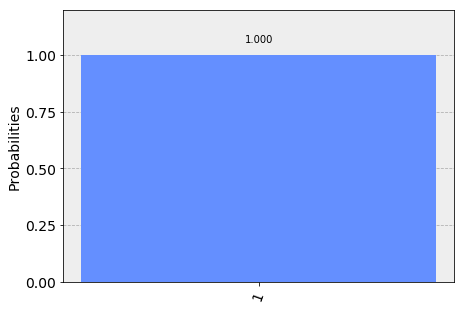

In [17]:
plot_histogram(result.get_counts(measure_x))

Again you should see a 100% probalility of a 1. Don't worry if this isn't clear yet, you will get more familiar with displaying the results later.

## The Hadamard gate (H gate)
The hadamard gate is one of the most common gates used in quantum computing, and one that you surely will get more aquainted with as you explore quantum computing. The hadamard gate transforms the state of a Qubit to and from superposition. This is often used at the start of quantum algorithms, as Qubits usually needs to be in a superposition for certain algorithms to work.

In [18]:
# We make a new Qunatum Circuite, as we did earlier, and call it measure_h
measure_h = QuantumCircuit(qr,cr)

# We append a H gate to the circuit and then draw it
measure_h.h(qr[0])
measure_h.draw()

In [19]:
# Lets measure the Qubit after the H gate has put it in superposition

# Here we append a measure
measure_h.measure(qr[0], cr[0])

# Here we run our circuit
result = execute(measure_h, backend).result()

In [20]:
counts = result.get_counts(measure_h)

In [21]:
counts

{'1': 518, '0': 506}

Last time we got the result: {'1': 1024}, now we got {'0': 512, '1': 512}, why is this?

Putting a Qubit in superposition makes it have a 50% chance of being a 1 or a 0 when measured. 

    {'1': 1024}              = 100% chance of the result being a 1.
    {'0': 512, '1': 512}     = 50% chance of 0, 50% chance of 1.
    
Lets visualize the result:

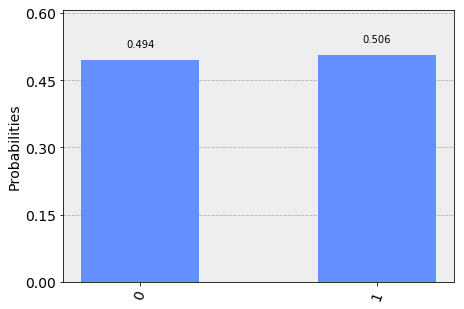

In [22]:
plot_histogram(counts)

## The C-NOT (Controlled-NOT) gate
This gate is known as a two-Qubit gate, which means that it needs two Qubits to function.

The C-NOT gate acts as an X gate, flipping the value of a certain Qubit, but only if another Qubit has the value of 1. One Qubit is the "control" Qubit and the other is the "target" Qubit. 

If the "control" Qubit is in the state |0> nothing happens to the "target", but if the "control" Qubit is in state |1> an X gate operation is applied to the "target" Qubit.

Lets demonstrate:

In [23]:
# We create a new Quantum Register with 2 qubits.
qr2 = QuantumRegister(2)

# We also need to create a classical register to hold our measured values
cr2 = ClassicalRegister(2)

# Finally the circuit:
measure_CX = QuantumCircuit(qr2,cr2)

# Here we append a C-NOT (CX) gate to our circuit
measure_CX.cx(qr2[0],qr2[1])

# Lastly the measure
measure_CX.measure(qr2, cr2)

measure_CX.draw()

In [24]:
result = execute(measure_CX, backend).result()

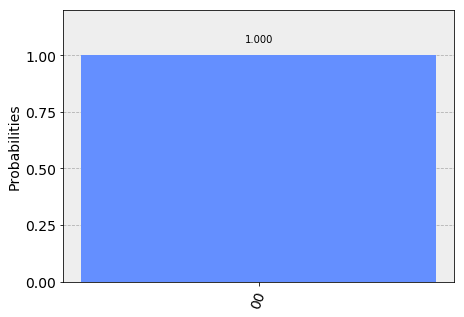

In [25]:
counts = result.get_counts(measure_CX)
plot_histogram(counts)

### What happened?

Well. not much. Remember that the default state of a Qubit is 0, and that C-NOT gates only flip Qubits when the "control" Qubit is 1? Since our input was 00 (0 for both Qubits in our Quantum Register), our output was 00 as well.

Let's try again, but this time lets add an X gate to one of out Qubits.

In [26]:
# Starting over we build a new Quantum Circuit
measure_CX = QuantumCircuit(qr2,cr2)

# This time we add an X gate to the circuits first Qubit (qr2[0] = the first Qubit)
measure_CX.x(qr2[0])

# We also add the C-NOT gate to the first Qubit (qr2[0]) which is then considered the "control". The second Qubit (qr2[1]) is regarded as the target.
measure_CX.cx(qr2[0],qr2[1])

# We add a measure of the Qubits
measure_CX.measure(qr2, cr2)

# Lastly we draw the circuit
measure_CX.draw()

In [27]:
result = execute(measure_CX, backend).result()
counts = result.get_counts(measure_CX)

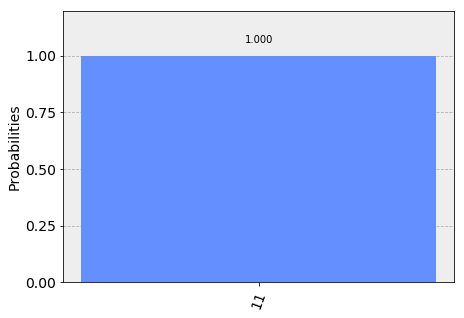

In [28]:
plot_histogram(counts)

## What happend?

Well. something. This time our input was 01, after the X gate flipped the state of the first Qubit, and our output was 11.

Firstly, the result (11) visualized above should be read from **right** to **left**, as in binary.
    
    11 = First Qubit value = 1, Second Qubit value = 1
    
Secondly, our result ended up as 11, since our first Qubit is fliped by the X gate from it's default value of 0 to a value of 1. Since the first Qubit is the "control" Qubit in our C-NOT gate, and the value of said Qubit is 1, it flips the "target" Qubit, the second Qubit. Giving us a result of 11. 

Now lets talk about entanglement.

### Using C-NOT gates while in superposition.

If we try to apply the C-NOT gate to our Qubits while the control Qubit is in a superposition, the two Qubits becomes entangled. This means that the stocastic outcomes between the two Qubits become correlated in all future operations.

In [29]:
# We build a new circuit with two Qubits
measure_CX_SP = QuantumCircuit(qr2,cr2)

# We add a hadamard gate to put our first Qubit in a superposition
measure_CX_SP.h(qr2[0])

# We add a X gate to flip the Qubit we just put in superposition
measure_CX_SP.x(qr2[0])

# A C-NOT gate with Qubit 0 as the control, and Qubit 1 as the target.
measure_CX_SP.cx(qr2[0],qr2[1])

# To pull our first Qubit out of superposition, we add a second H gate to calncle out the first one.
measure_CX_SP.h(qr2[0])

# This is a barrier, it dosent do anything, but it helps allign the drawing
measure_CX_SP.barrier();

# We then add a measurement on the two Qubits
measure_CX_SP.measure(qr2, cr2)

# We draw the circuit
measure_CX_SP.draw()

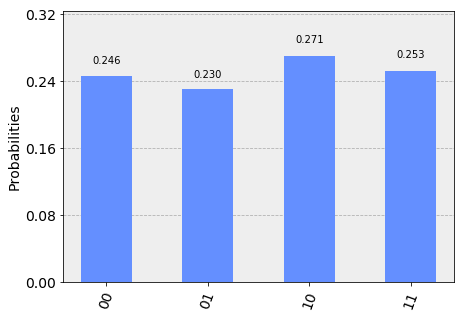

In [30]:
result = execute(measure_CX_SP, backend).result()
counts = result.get_counts(measure_CX_SP)
plot_histogram(counts)

### What happened? 

We entangled the Qubits by adding the C-NOT gate to a circuit with a Qubit in superposition as the "control". Because the Qubit in superposition has equal chances of being 0 and 1, the "target" Qubit has similar chances, as it is entangled with the "control". Therefore, the measurement of one bit will give the result of the other. 

The properbility of a outcome is defined as 1/n where n = amount of entagled Qubits.

# Running code on a real Quantum Computer

As you may have noticed, all our tests up until now have only been running on a simulation. This is known as the 'qasm_simulator', which is defined in our backend.

In [31]:
BasicAer.get_backend('qasm_simulator');

The simulator is fine for running most basic quantum circuits, since the outcomes of these calculations are already known. But if you want to develop new algorithms or try out the later example we will need to run them on a real machine. 

To run our calculations on a existing quantum computer, we must first import IBMQ 

In [32]:
from qiskit import IBMQ

To run any algorithm on IBMQ you need a user, or more specifically you need an API Token. Getting one is easy, just follow this link: https://quantumexperience.ng.bluemix.net/qx/account/advanced.

1. Put your API Token in the section marked Your_Key_Here in the cell below. 
2. Don't delete the "".
3. Remember to outcomment the cell (remove the # at the start of the line)

In [33]:
# API_Token = "de8b458767c048db841ebbbc7a7b1bb2a4004c5086812ca496261e6b89f02653814ae8f1db62e5108cd86a2edb6630d101a4df03ab6526de8c7fa55129c5770f"

In [34]:
# We now save the account so we can use it with IBMQ
IBMQ.save_account(API_Token)
# And now we register which account we are using.
IBMQ.load_accounts()

NameError: name 'API_Token' is not defined

### Choosing a backend
The qasm simulator is only one of a handfull of available backends to use for running our quantum programs. Too see all available backends, we can run the following code.

In [35]:
# Get list of available backends
IBMQ.backends()

[]

In [36]:
# But for the sake of speed we will use the least busy one
from qiskit.providers.ibmq import least_busy
device = least_busy(IBMQ.backends(simulator=False))

QiskitError: 'Can only find least_busy backend from a non-empty list.'

In [37]:
# We can now Generate a quantum circuit like before.
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

In [38]:
# We add an x gate at q0
qc.x(q[0])

# And add a measure to our Qubit.
measure = qc.measure(q, c)

In [39]:
qc.draw()

In [40]:
from qiskit.tools.monitor import job_monitor

# We excecute the job on the choosen backend
job_sim = execute(qc, device)

# The job monitor makes it possible for us to monitor our job in real time
job_monitor(job_sim, monitor_async=True)

NameError: name 'device' is not defined

After a couple of seconds you should see an output with the status of your job in the cell above. This can take some time depending on how busy the machines are. So grab a cup of coffee, or continue on while we wait.

In [41]:
# When the job is done, the results can be showed below.
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

NameError: name 'job_sim' is not defined

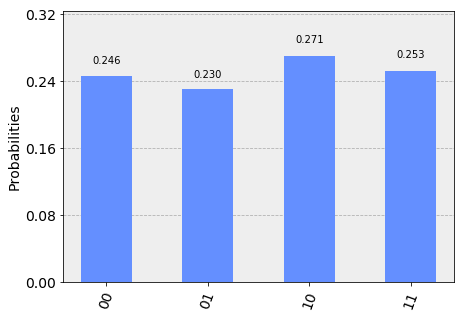

In [42]:
plot_histogram(counts)

# Quantum algorithms

## Random number generation

Now let's try using the quantum computer for something usefull! Generating random numbers!!

It's funny but generating truly random numbers are not as easy as you might think, but quantum computers can help us making our random a little more random.

In [43]:
from qiskit import BasicAer, execute

In [44]:
# You should know by now that this is how you build a Quantum Circuit
q = QuantumRegister(1)
c = ClassicalRegister(1)
circ = QuantumCircuit(q, c)

# Here we add an H gate, the one that puts Qubits in superposition
circ.h(q)
# Lastly a measure of the Qubit
circ.measure(q, c)

In [45]:
# We choose a backend, like before. To save you from waiting we have chosen the simulator backend. 
# ...If you're smart enough you can set up the real Qunatum Computer, if you want to.
backend = BasicAer.get_backend('qasm_simulator')

# We run our circuit. You might notice that it says "shots=8" and "memory=True"
# Shots is the amount of times the circuit should be run.
# Memory=True just tells the computer to store the result from each Shot.
job = execute(circ, backend, shots=8, memory=True)

When you run the cell below you will see a line with the same amount of bits as the number of Shots we defined above. 

In [46]:
data = job.result().get_memory()
print(data)

['0', '1', '0', '1', '1', '1', '0', '1']


In [47]:
# Here we take each bit from each shot, and put them in an object called "s", which we then print.
s = ""
for x in range (0,len(data)):
    s += data[x]
print(s)

01011101


In [49]:
# Run this cell to take the object "s" from before, which is now a binary number, and display it as a real number.
int(s, 2)

93

You just made a random number! :P 